Chap 08 
https://www.nltk.org/book/ch08.html

Context Free Grammar

In [ ]:
from nltk import word_tokenize
nltk.download('punkt')
word_tokenize("Mary saw a cat with Bob.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Mary', 'saw', 'a', 'cat', 'with', 'Bob', '.']

# 1.2 Ubiquitous Ambiguity

In [1]:
import nltk
groucho_grammar = nltk.CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | Det N PP | 'I'
 VP -> V NP | VP PP
 Det -> 'an' | 'my'
 N -> 'elephant' | 'pajamas'
 V -> 'shot'
 P -> 'in'
 """)

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)
    print('\n')

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))




# 3.1 A Simple Grammar

In [ ]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [ ]:
# sent = "Bob saw my dog with Mary".split()
sent = "Bob saw my cat".split()

# load your grammar
# grammar1 = nltk.data.load('file:mygrammar.cfg')
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
  print(tree)
# tree.draw()

(S (NP Bob) (VP (V saw) (NP (Det my) (N cat))))


# 3.3  Recursion in Syntactic Structure

In [ ]:
grammar2 = nltk.CFG.fromstring("""
  S  -> NP VP
  NP -> Det Nom | PropN
  Nom -> Adj Nom | N
  VP -> V Adj | V NP | V S | V NP PP
  PP -> P NP
  PropN -> 'Buster' | 'Chatterer' | 'Joe'
  Det -> 'the' | 'a'
  N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
  Adj  -> 'angry' | 'frightened' |  'little' | 'tall'
  V ->  'chased'  | 'saw' | 'said' | 'thought' | 'was' | 'put'
  P -> 'on'
  """)

In [ ]:
sent = "the angry bear chased the frightened little squirrel".split() #  nested nominal phrases
rd_parser = nltk.RecursiveDescentParser(grammar2)
for tree in rd_parser.parse(sent):
  print(tree)

(S
  (NP (Det the) (Nom (Adj angry) (Nom (N bear))))
  (VP
    (V chased)
    (NP
      (Det the)
      (Nom (Adj frightened) (Nom (Adj little) (Nom (N squirrel)))))))


In [ ]:
sent = "Joe said the bear chased a squirrel".split() #  nested sentences.
rd_parser = nltk.RecursiveDescentParser(grammar2)
for tree in rd_parser.parse(sent):
  print(tree)

(S
  (NP (PropN Joe))
  (VP
    (V said)
    (S
      (NP (Det the) (Nom (N bear)))
      (VP (V chased) (NP (Det a) (Nom (N squirrel)))))))


# 4.1 Recursive Descent Parsing
![rdparser1-6[1].png](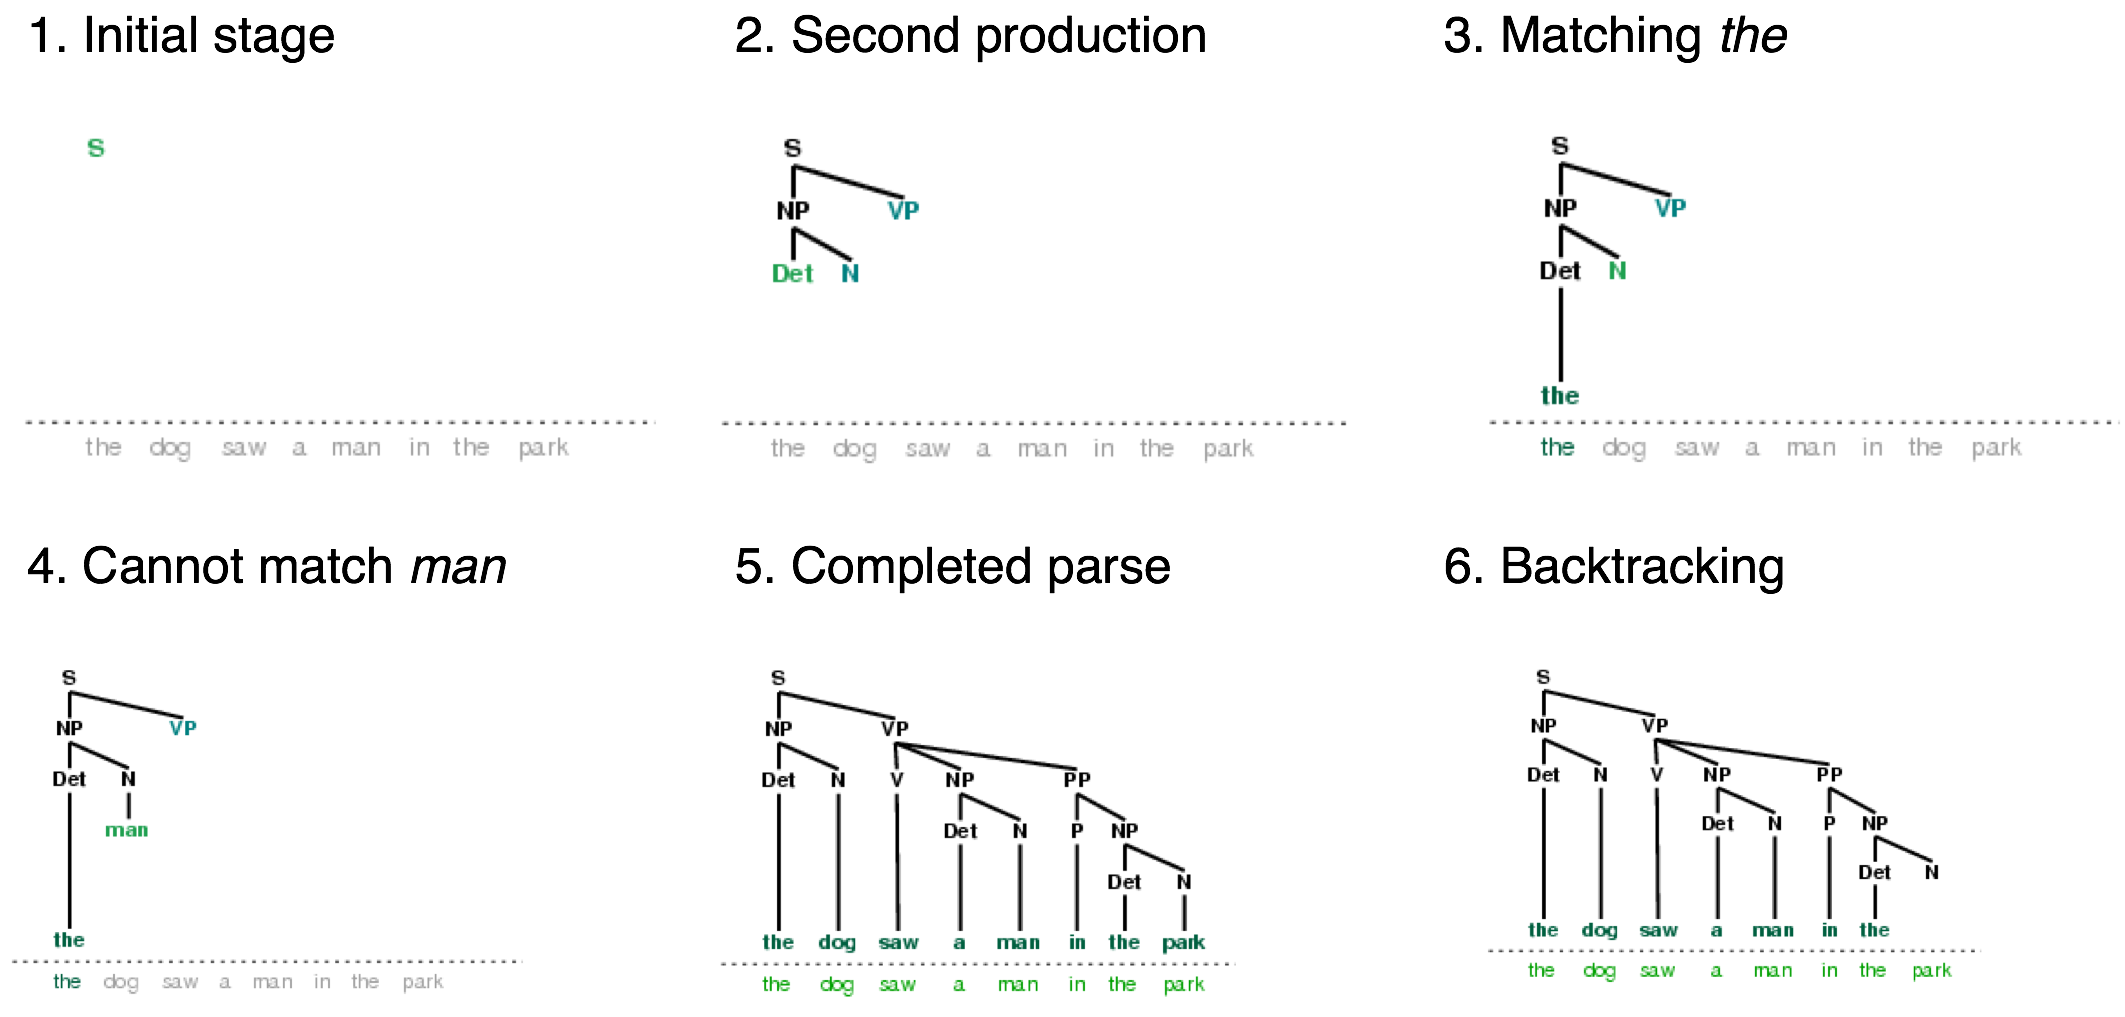)

In [ ]:
 rd_parser = nltk.RecursiveDescentParser(grammar1,trace=3) # trace 0, 1, 2, 3
sent = 'Mary saw a dog'.split()
for tree in rd_parser.parse(sent):
  print(tree)
  print('==================')

Parsing 'Mary saw a dog'
Start:
    [ * S ]
Expand: S -> NP VP
    [ * NP VP ]
Expand: NP -> 'John'
    [ * 'John' VP ]
Backtrack: 'Mary' match failed
Expand: NP -> 'Mary'
    [ * 'Mary' VP ]
Match: 'Mary'
    [ 'Mary' * VP ]
Expand: VP -> V NP
    [ 'Mary' * V NP ]
Expand: V -> 'saw'
    [ 'Mary' * 'saw' NP ]
Match: 'saw'
    [ 'Mary' 'saw' * NP ]
Expand: NP -> 'John'
    [ 'Mary' 'saw' * 'John' ]
Backtrack: 'a' match failed
Expand: NP -> 'Mary'
    [ 'Mary' 'saw' * 'Mary' ]
Backtrack: 'a' match failed
Expand: NP -> 'Bob'
    [ 'Mary' 'saw' * 'Bob' ]
Backtrack: 'a' match failed
Expand: NP -> Det N
    [ 'Mary' 'saw' * Det N ]
Expand: Det -> 'a'
    [ 'Mary' 'saw' * 'a' N ]
Match: 'a'
    [ 'Mary' 'saw' 'a' * N ]
Expand: N -> 'man'
    [ 'Mary' 'saw' 'a' * 'man' ]
Backtrack: 'dog' match failed
Expand: N -> 'dog'
    [ 'Mary' 'saw' 'a' * 'dog' ]
Match: 'dog'
    [ 'Mary' 'saw' 'a' 'dog' ]
GOOD PARSE:
    [ 'Mary' 'saw' 'a' 'dog' ]
(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))
Expand: 

# 4.2 Shift-Reduce Parsing
![srparser1-6[1].png](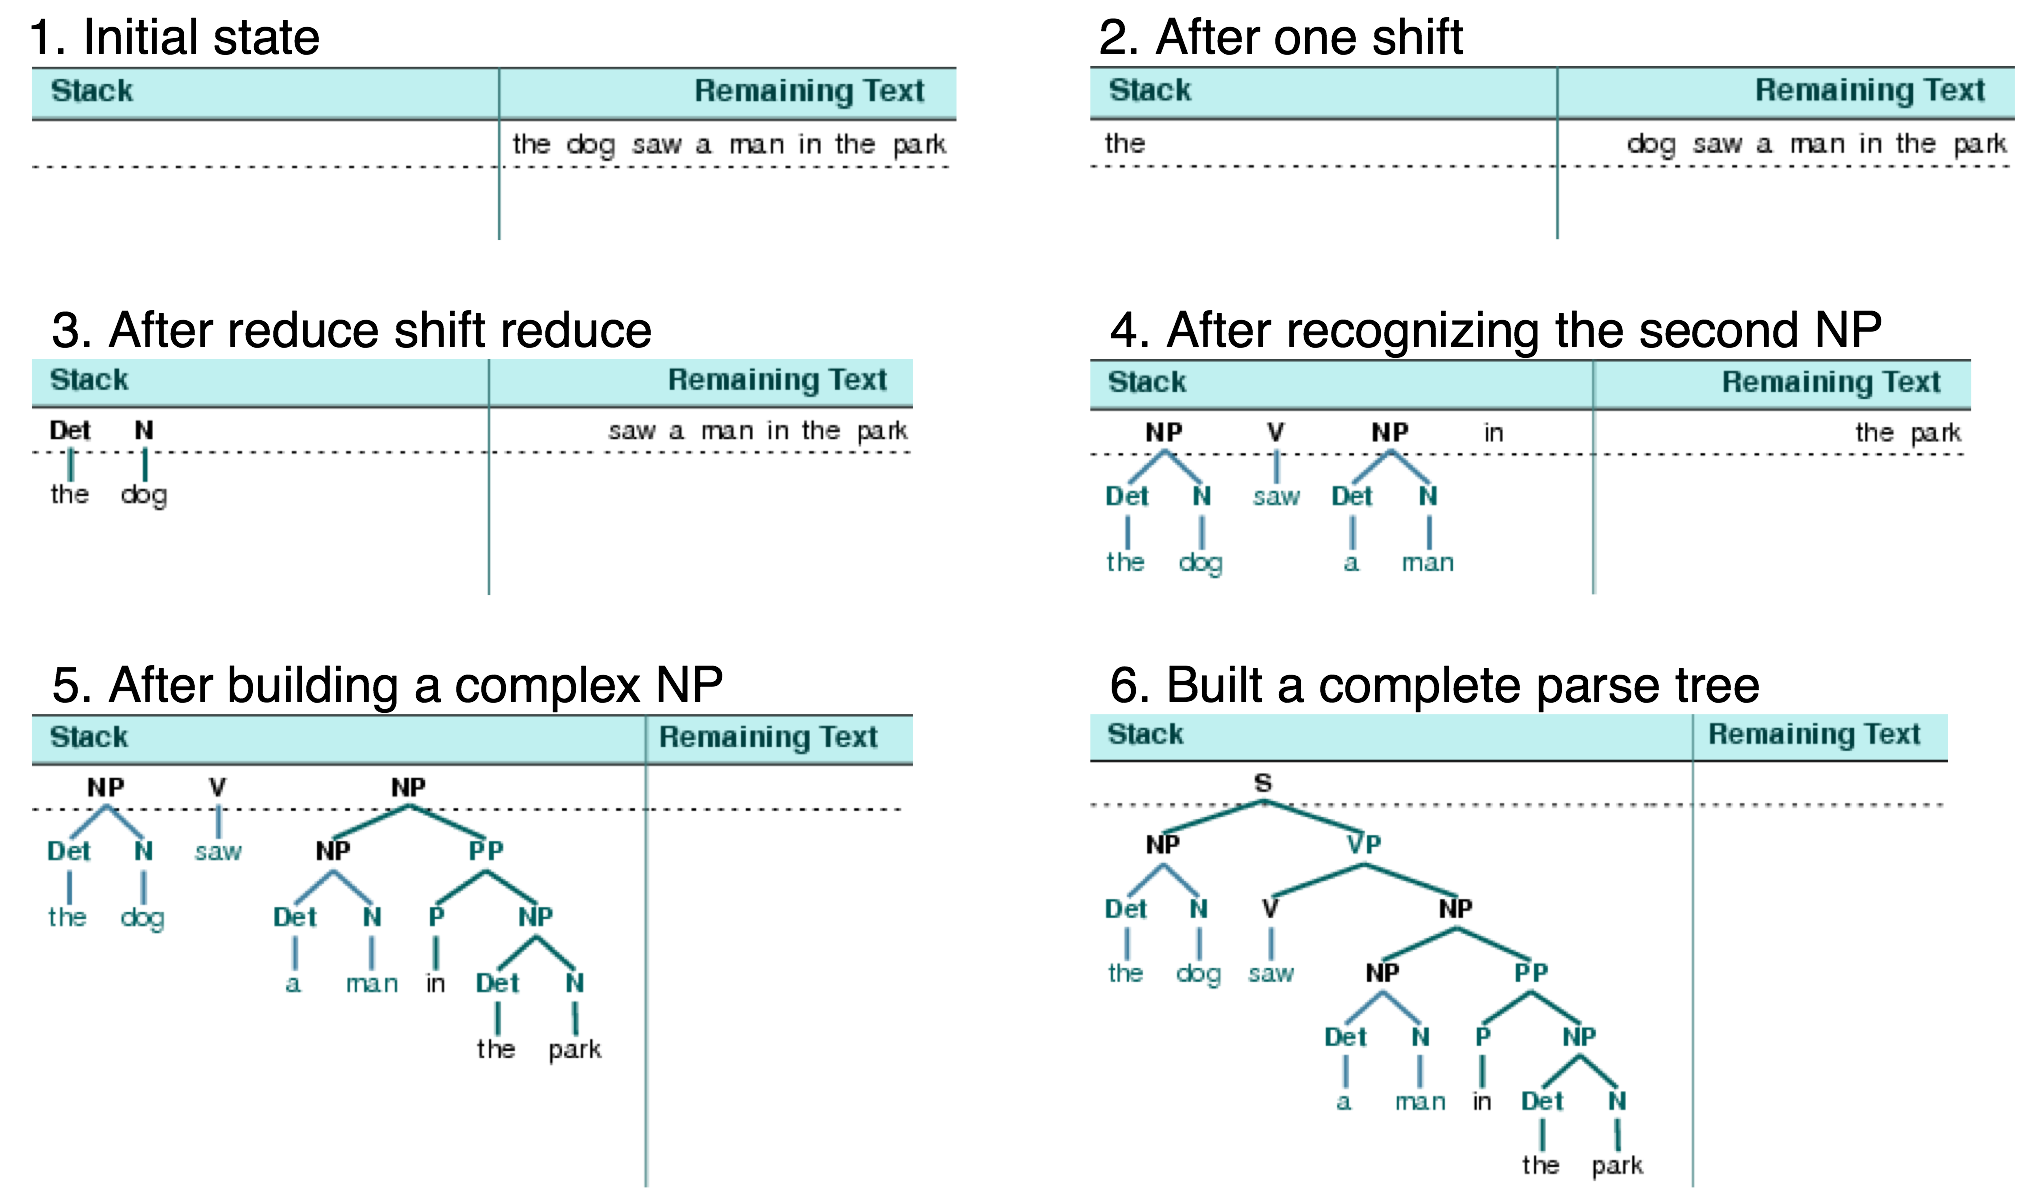)

In [ ]:
sr_parser = nltk.ShiftReduceParser(grammar1,trace=2)
sent = 'Mary saw a dog'.split()
for tree in sr_parser.parse(sent):
  print(tree)

Parsing 'Mary saw a dog'
    [ * Mary saw a dog]
  S [ 'Mary' * saw a dog]
  R [ NP * saw a dog]
  S [ NP 'saw' * a dog]
  R [ NP V * a dog]
  S [ NP V 'a' * dog]
  R [ NP V Det * dog]
  S [ NP V Det 'dog' * ]
  R [ NP V Det N * ]
  R [ NP V NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


A left-corner parser is a top-down parser with bottom-up filtering

# 4.4 Well-Formed Substring Tables
dynamic programming techniques; chart parsing; bottom up; user-defined parser

In [ ]:
text = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
groucho_grammar.productions(rhs=text[0]) # use the grammar we defined in the 1.2, get label of the first word

[NP -> 'I']

we record the position of the words by filling in cells in a triangular matrix: the vertical axis will denote the start position of a substring, while the horizontal axis will denote the end position (thus shot will appear in the cell with coordinates (1, 2)).
![chart_positions2[1].png](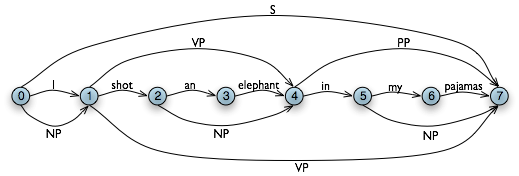)

In [ ]:
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)] 
    for i in range(numtokens):
        productions = grammar.productions(rhs=tokens[i])
        wfst[i][i+1] = productions[0].lhs()
    return wfst

def display(wfst, tokens):
    print('\nWFST ' + ' '.join(("%-4d" % i) for i in range(1, len(wfst))))
    for i in range(len(wfst)-1):
        print("%d   " % i, end=" ")
        for j in range(1, len(wfst)):
            print("%-4s" % (wfst[i][j] or '.'), end=" ")
        print()

tokens = "I shot an elephant in my pajamas".split()
wfst0 = init_wfst(tokens, groucho_grammar)
display(wfst0, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    .    .    .    .    
1    .    V    .    .    .    .    .    
2    .    .    Det  .    .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    .    
5    .    .    .    .    .    Det  .    
6    .    .    .    .    .    .    N    


In [ ]:
dict((p.rhs(), p.lhs()) for p in groucho_grammar.productions())

{('I',): NP,
 ('an',): Det,
 ('elephant',): N,
 ('in',): P,
 ('my',): Det,
 ('pajamas',): N,
 ('shot',): V,
 (Det, N): NP,
 (Det, N, PP): NP,
 (NP, VP): S,
 (P, NP): PP,
 (V, NP): VP,
 (VP, PP): VP}

In [ ]:
# for span in range(2,7+1):
#   for s in range(7+1-span):
#     print(span+s)

In [ ]:
def complete_wfst(wfst, tokens, grammar, trace=False):
    index = dict((p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens+1): # from position 2 to the end 
        for start in range(numtokens+1-span): # for each start postion, iterate 1-hop, 2-hop...
            end = start + span
            for mid in range(start+1, end): #for each range, iterate each middle position
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1,nt2) in index:
                    wfst[start][end] = index[(nt1,nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                        (start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
    return wfst
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar, trace=True)
display(wfst1, tokens)
# combine low-level label into high-level label

[2] Det [3]   N [4] ==> [2]  NP [4]
[5] Det [6]   N [7] ==> [5]  NP [7]
[1]   V [2]  NP [4] ==> [1]  VP [4]
[4]   P [5]  NP [7] ==> [4]  PP [7]
[0]  NP [1]  VP [4] ==> [0]   S [4]
[1]  VP [4]  PP [7] ==> [1]  VP [7]
[0]  NP [1]  VP [7] ==> [0]   S [7]

WFST 1    2    3    4    5    6    7   
0    NP   .    .    S    .    .    S    
1    .    V    .    VP   .    .    VP   
2    .    .    Det  NP   .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    PP   
5    .    .    .    .    .    Det  NP   
6    .    .    .    .    .    .    N    


# Dependencies and Dependency Grammar
how words relate to other words

In [ ]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
""")
print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


In [ ]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
  print(tree)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


# 6.1 Treebanks and Grammars

In [ ]:
from nltk.corpus import treebank
nltk.download('treebank')
t = treebank.parsed_sents('wsj_0001.mrg')[0]
print(t)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


In [ ]:
# To find verbs that take sentential complements
def filter(tree):
    child_nodes = [child.label() for child in tree
                   if isinstance(child, nltk.Tree)]
    return  (tree.label() == 'VP') and ('S' in child_nodes)

from nltk.corpus import treebank
[subtree for tree in treebank.parsed_sents() for subtree in tree.subtrees(filter)][:3]

[Tree('VP', [Tree('VBN', ['named']), Tree('S', [Tree('NP-SBJ', [Tree('-NONE-', ['*-1'])]), Tree('NP-PRD', [Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('DT', ['this']), Tree('JJ', ['British']), Tree('JJ', ['industrial']), Tree('NN', ['conglomerate'])])])])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree(',', [',']), Tree('``', ['``']), Tree('S', [Tree('NP-SBJ', [Tree('DT', ['This'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('DT', ['an']), Tree('JJ', ['old']), Tree('NN', ['story'])])])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])])]

In [ ]:
entries[0]

PPAttachment(sent='0', verb='join', noun1='board', prep='as', noun2='director', attachment='V')

In [ ]:
# Prepositional Phrase Attachment Corpus, source of information about the valency of particular verbs
from collections import defaultdict
nltk.download('ppattach')
entries = nltk.corpus.ppattach.attachments('training')
table = defaultdict(lambda: defaultdict(set))
for entry in entries:
  key = entry.noun1 + '-' + entry.prep + '-' + entry.noun2
  table[key][entry.attachment].add(entry.verb)

for key in sorted(table):
  if len(table[key]) > 1:
    print(key, 'N:', sorted(table[key]['N']), 'V:', sorted(table[key]['V']))

[nltk_data] Downloading package ppattach to /root/nltk_data...
[nltk_data]   Package ppattach is already up-to-date!
%-below-level N: ['left'] V: ['be']
%-from-year N: ['was'] V: ['declined', 'dropped', 'fell', 'grew', 'increased', 'plunged', 'rose', 'was']
%-in-August N: ['was'] V: ['climbed', 'fell', 'leaping', 'rising', 'rose']
%-in-September N: ['increased'] V: ['climbed', 'declined', 'dropped', 'edged', 'fell', 'grew', 'plunged', 'rose', 'slipped']
%-in-week N: ['declined'] V: ['was']
%-to-% N: ['add', 'added', 'backed', 'be', 'cut', 'go', 'grow', 'increased', 'increasing', 'is', 'offer', 'plummet', 'reduce', 'rejected', 'rise', 'risen', 'shaved', 'wants', 'yield', 'zapping'] V: ['fell', 'rise', 'slipped']
%-to-million N: ['declining'] V: ['advanced', 'climbed', 'cutting', 'declined', 'declining', 'dived', 'dropped', 'edged', 'fell', 'gained', 'grew', 'increased', 'jump', 'jumped', 'plunged', 'rising', 'rose', 'slid', 'slipped', 'soared', 'tumbled']
1-to-21 N: ['dropped'] V: ['dro

# 6.2 Pernicious Ambiguity

In [ ]:
grammar = nltk.CFG.fromstring("""
S -> NP V NP
NP -> NP Sbar
Sbar -> NP V
NP -> 'fish'
V -> 'fish'
""")

In [ ]:
tokens = ["fish"] * 7
cp = nltk.ChartParser(grammar)
for tree in cp.parse(tokens):
  print(tree)

(S
  (NP (NP fish) (Sbar (NP fish) (V fish)))
  (V fish)
  (NP (NP fish) (Sbar (NP fish) (V fish))))
(S
  (NP fish)
  (V fish)
  (NP
    (NP (NP fish) (Sbar (NP fish) (V fish)))
    (Sbar (NP fish) (V fish))))
(S
  (NP fish)
  (V fish)
  (NP
    (NP fish)
    (Sbar (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish))))
(S
  (NP
    (NP (NP fish) (Sbar (NP fish) (V fish)))
    (Sbar (NP fish) (V fish)))
  (V fish)
  (NP fish))
(S
  (NP
    (NP fish)
    (Sbar (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish)))
  (V fish)
  (NP fish))


# 6.3   Weighted Grammar

Chart parsers improve the efficiency of computing multiple parses of the same sentences, but they are still overwhelmed by the sheer number of possible parses.
Weighted grammars and probabilistic parsing algorithms have provided an effective solution to these problems

use weight to denote language preference based on corpus



In [ ]:
def give(t):
    return t.label() == 'VP' and len(t) > 2 and t[1].label() == 'NP'\
           and (t[2].label() == 'PP-DTV' or t[2].label() == 'NP')\
           and ('give' in t[0].leaves() or 'gave' in t[0].leaves())
def sent(t):
    return ' '.join(token for token in t.leaves() if token[0] not in '*-0')
def print_node(t, width):
        output = "%s %s: %s / %s: %s" %\
            (sent(t[0]), t[1].label(), sent(t[1]), t[2].label(), sent(t[2]))
        if len(output) > width:
            output = output[:width] + "..."
        print(output)
for tree in nltk.corpus.treebank.parsed_sents():
  for t in tree.subtrees(give):
    print_node(t, 72)

gave NP: the chefs / NP: a standing ovation
give NP: advertisers / NP: discounts for maintaining or increasing ad sp...
give NP: it / PP-DTV: to the politicians
gave NP: them / NP: similar help
give NP: them / NP: 
give NP: only French history questions / PP-DTV: to students in a Europe...
give NP: federal judges / NP: a raise
give NP: consumers / NP: the straight scoop on the U.S. waste crisis
gave NP: Mitsui / NP: access to a high-tech medical product
give NP: Mitsubishi / NP: a window on the U.S. glass industry
give NP: much thought / PP-DTV: to the rates she was receiving , nor to ...
give NP: your Foster Savings Institution / NP: the gift of hope and free...
give NP: market operators / NP: the authority to suspend trading in futu...
gave NP: quick approval / PP-DTV: to $ 3.18 billion in supplemental appr...
give NP: the Transportation Department / NP: up to 50 days to review any...
give NP: the president / NP: such power
give NP: me / NP: the heebie-jeebies
give NP: holders / NP: 

In [8]:

grammar = nltk.CFG.fromstring("""
    S    -> NP VP              
    NP   -> Det N              
    VP   -> V NP               
    V   -> 'includes'          
    Det   -> 'the'             
    Det   -> 'a'               
    N -> 'meal'                
    N   -> 'flight'           
""")
# print(grammar)
sent = "the flight includes a meal".split()
rd_parser = nltk.RecursiveDescentParser(grammar)
for tree in rd_parser.parse(sent):
  print(tree)

(S (NP (Det the) (N flight)) (VP (V includes) (NP (Det a) (N meal))))


In [9]:
rd_parser = nltk.ChartParser(grammar)
for tree in rd_parser.parse(sent):
  print(tree)

(S (NP (Det the) (N flight)) (VP (V includes) (NP (Det a) (N meal))))


In [ ]:
# probabilistic context free grammar (or PCFG) 
grammar = nltk.PCFG.fromstring("""
    S    -> NP VP              [1.0]
    VP   -> TV NP              [0.4]
    VP   -> IV                 [0.3]
    VP   -> DatV NP NP         [0.3]
    TV   -> 'saw'              [1.0]
    IV   -> 'ate'              [1.0]
    DatV -> 'gave'             [1.0]
    NP   -> 'telescopes'       [0.8]
    NP   -> 'Jack'             [0.2]
""")
print(grammar)

Grammar with 9 productions (start state = S)
    S -> NP VP [1.0]
    VP -> TV NP [0.4]
    VP -> IV [0.3]
    VP -> DatV NP NP [0.3]
    TV -> 'saw' [1.0]
    IV -> 'ate' [1.0]
    DatV -> 'gave' [1.0]
    NP -> 'telescopes' [0.8]
    NP -> 'Jack' [0.2]


In [ ]:
1*0.2*0.4*1*0.8 # Commutative Property Of Multiplication

0.06400000000000002

In [ ]:
viterbi_parser = nltk.ViterbiParser(grammar)
for tree in viterbi_parser.parse(['Jack', 'saw', 'telescopes']):
  print(tree)

(S (NP Jack) (VP (TV saw) (NP telescopes))) (p=0.064)


# WordNet
 https://www.nltk.org/book/ch02.html

WordNet is a semantically-oriented dictionary of English



In [ ]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
wn.synsets('car')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [ ]:
wn.synsets('car')[0].lemma_names() # lemmatize words and find synonyms in different variant forms

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [ ]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [ ]:
for synset in wn.synsets('car'):
  print(synset, "->" ,synset.lemma_names())

Synset('car.n.01') -> ['car', 'auto', 'automobile', 'machine', 'motorcar']
Synset('car.n.02') -> ['car', 'railcar', 'railway_car', 'railroad_car']
Synset('car.n.03') -> ['car', 'gondola']
Synset('car.n.04') -> ['car', 'elevator_car']
Synset('cable_car.n.01') -> ['cable_car', 'car']


 To eliminate ambiguity, we will identify these words as car.n.01.automobile

In [ ]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [ ]:
wn.synset('car.n.04').definition()

'where passengers ride up and down'

synset: parent node, lemma: child node

In [ ]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [ ]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

## 5.2   The WordNet Hierarchy
find the (immediate) hyponyms and hypernyms
![wordnet-hierarchy[1].png](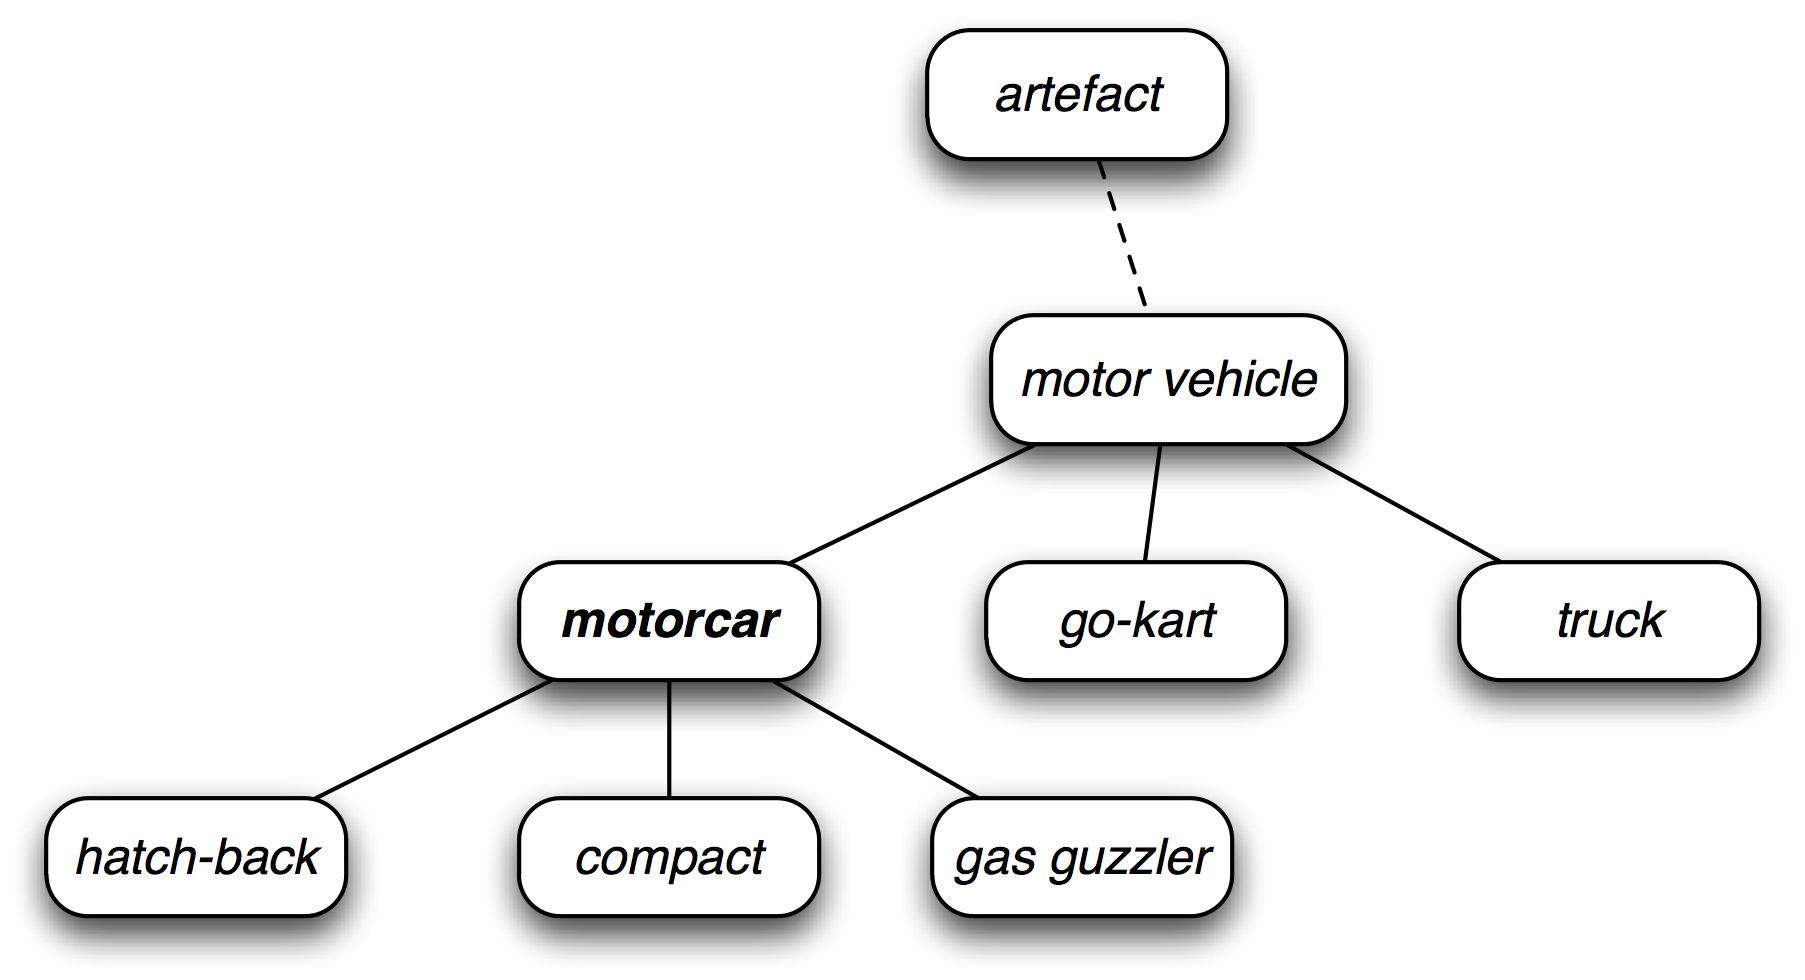)

Hypernym Synset > Hyponym Synset > Lemmas

In [ ]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[:5]

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03')]

In [ ]:
for synset in types_of_motorcar[:5]:
  print(synset)
  for lemma in synset.lemmas()[:5]:
    print(lemma)

Synset('ambulance.n.01')
Lemma('ambulance.n.01.ambulance')
Synset('beach_wagon.n.01')
Lemma('beach_wagon.n.01.beach_wagon')
Lemma('beach_wagon.n.01.station_wagon')
Lemma('beach_wagon.n.01.wagon')
Lemma('beach_wagon.n.01.estate_car')
Lemma('beach_wagon.n.01.beach_waggon')
Synset('bus.n.04')
Lemma('bus.n.04.bus')
Lemma('bus.n.04.jalopy')
Lemma('bus.n.04.heap')
Synset('cab.n.03')
Lemma('cab.n.03.cab')
Lemma('cab.n.03.hack')
Lemma('cab.n.03.taxi')
Lemma('cab.n.03.taxicab')
Synset('compact.n.03')
Lemma('compact.n.03.compact')
Lemma('compact.n.03.compact_car')


In [ ]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [ ]:
paths = motorcar.hypernym_paths()
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [ ]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [ ]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]